In [20]:
import numpy as np
from shapely.geometry.polygon import LinearRing, Polygon
from shapely.geometry import Point
import random
from shapely import affinity
import matplotlib.pyplot as plt
%matplotlib notebook

In [21]:
class Room():        
    def __init__(self, shape):
        self.shape = shape
        self.polygon = Polygon(np.array(shape, dtype=np.float64))

In [22]:
class FurnitureItem(): 
    def __init__(self, unitcost, shape):
        self.shape = shape
        self.unit_cost = unitcost
        self.polygon = Polygon(np.array(shape, dtype=np.float64))
        self.total_cost = np.float64((np.float64(self.unit_cost) * self.polygon.area))

In [23]:
class Problem():
    def __init__(self, room, furniture):
        self.room = room
        self.furniture = furniture

In [24]:
problems = []
with open('problems.rfp') as f:
    for line in f:
        furnitureList = []
        problem = line.replace(" ","").split("#")

        room_shape = problem[0].split(":")[1]
        furniture = problem[1].split(";")

        room = Room([tuple(np.float64(i) for i in el.strip('()').split(',')) for el in room_shape.split('),(')])

        for furnitureItem in furniture:
            parse_furniture = furnitureItem.strip().split(":")
            unit_cost = parse_furniture[0]
            shape = [tuple(np.float64(i) for i in el.strip('()').split(',')) for el in parse_furniture[1].split('),(')]
            furnitureItem = FurnitureItem(unit_cost, shape)
            furnitureList.append(furnitureItem)
        problems.append(Problem(room,furnitureList))

In [25]:
def plot(poly):
    x,y = poly.exterior.xy
    plt.plot(x, y, color='#6699cc', alpha=0.7, linewidth=3, solid_capstyle='round', zorder=2)
    plt.show()

In [26]:
len(problems[0].furniture)

94

In [27]:
def random_points_within(poly, num_points):
    min_x, min_y, max_x, max_y = poly.bounds
    points = []
    while len(points) < num_points:
        random_point = Point([random.uniform(min_x, max_x), random.uniform(min_y, max_y)])
        if (random_point.within(poly)):
            points.append(random_point)
    return points

In [105]:
solution = []
room_2 = problems[10].room.polygon
shapes = copy.copy(problems[10].furniture)
for i in range(100):
    for j in shapes:
        points = random_points_within(room_2,1)[0]
        polygon = affinity.translate(j.polygon, points.x, points.y)
        polygon = affinity.rotate(polygon, random.uniform(0,45),origin="centroid")
        if room_2.contains(polygon):
            room_2 = room_2.difference(polygon)
            x,y = polygon.exterior.xy
            solution.append(list(zip(*(x,y))))
            shapes.remove(j)
            print(len(shapes))
room_2.area

499
498
497
496
495
494
493
492
491
490
489
488
487
486


76.49999999999991

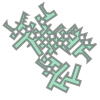

In [103]:
room_2

In [104]:
output = ""
for x in solution:
    output = output + str(x[:-1]).replace('[','').replace(']','') + "; "
print(output)

(-11.314594929759547, 0.17817709857157826), (-10.500284279995604, -0.40225219572792703), (-9.9198549856961, 0.4120584540360186), (-10.734165635460043, 0.9924877483355234); (-2.4923788628675467, -0.3097960222282382), (-1.4987825411168487, -0.19680775114011279), (-1.611770812204974, 0.7967885706105854), (-2.605367133955672, 0.68380029952246); (-9.387681562864817, -4.869229077025711), (-10.385705757270047, -4.806398293314311), (-10.448536540981449, -5.8044224877195445), (-9.450512346576215, -5.8672532714309416); (-8.672381208619772, 1.149474108581861), (-8.863735775736382, 2.130995086270884), (-9.845256753425403, 1.9396405191542763), (-9.653902186308796, 0.9581195414652535); (-12.631912872244726, 1.3160826220158406), (-11.634581933166494, 1.3890963053727137), (-11.707595616523369, 2.386427244450945), (-12.7049265556016, 2.3134135610940723); (-5.852167371307063, 1.0664568137747112), (-5.774271339745867, 2.0634183016301937), (-6.771232827601349, 2.14131433319139), (-6.849128859162546, 1.144